In [1]:
%matplotlib inline

 ### Its a start...
 * Helpful resources: 
     + https://pytorch.org/vision/master/auto_examples/plot_visualization_utils.html#visualizing-bounding-boxes
     + https://pytorch.org/vision/master/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html#torchvision.models.detection.fasterrcnn_resnet50_fpn
     + https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html
 * Add cuda support
      + CUDA works now but, I run out of GPU memory super fast 
      + If I want to do this in a jupyter notebook I need to restart the kernal every time I run out of GPU mem
      + Do I switch to regular .py? 
      + Use this to query gpu: **nvidia-smi --query-gpu=memory.used --format=csv**
 * Time Several Different Models 
      + Timing for Faster R-CNN
 
 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

print(torch.cuda.is_available())
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

True


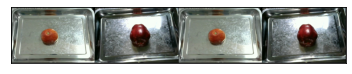

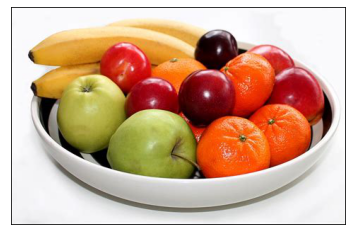

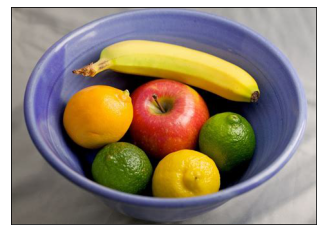

In [3]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

# Images need to be the same size to make a grid 
apple1_int = read_image(str(Path('../assets') / 'Apple01.jpg'))
apple2_int = read_image(str(Path('../assets') / 'Apple02.jpg'))
fruit1_int = read_image(str(Path('../assets') / 'Fruit01.jpg'))
fruit2_int = read_image(str(Path('../assets') / 'Fruit02.jpg'))
#esp1_int = read_image(str(Path('../assets') / 'bn.jpg'))


grid = make_grid([apple1_int, apple2_int, apple1_int, apple2_int])

show(grid)
show(fruit1_int)
show(fruit2_int)


In [4]:
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms.functional import convert_image_dtype

# For monitoring stuff 
import time 
import os 

# As of now most of the important stuff happens here 

os.system("nvidia-smi --query-gpu=memory.used --format=csv")

try: 
    t0 = time.time()

    # Inputs and model need to be on the GPU
    fruit2_int = fruit2_int.to(device)

    batch_int = torch.stack([fruit2_int])

    batch = convert_image_dtype(batch_int, dtype=torch.float)

    model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)

    model = model.eval() 

    # Inputs and model need to be on the GPU
    model = model.to(device)

    outputs = model(batch)

    t1 = time.time()

    print(t1 - t0)
    
except RuntimeError:
    print("Out of GPU Memory")
    torch.cuda.empty_cache() # Seems like this is useless 
    os.system("nvidia-smi --query-gpu=memory.used --format=csv")
    #print(len(outputs[0]['labels']))

print(outputs)

C:\Users\Colin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


5.446459054946899
[{'boxes': tensor([[ 93.7558,  54.8761, 406.8557, 153.8046],
        [ 83.7814, 124.8228, 190.4058, 219.0652],
        [182.3680, 111.4365, 310.0251, 242.8618],
        [220.9008, 221.7708, 323.3171, 299.1324],
        [290.6341, 164.2559, 382.1283, 269.8524],
        [ 23.1641,  14.9003, 466.3385, 332.7375],
        [125.4475, 212.4282, 217.7211, 290.9086],
        [ 84.2024, 133.5287, 412.7674, 330.2387],
        [  0.0000,   2.1608, 402.6860, 298.9389],
        [ 66.2242,  30.0925, 414.4681, 210.6485],
        [127.8660,  85.5493, 358.2959, 258.8524],
        [  4.1769, 109.6103, 217.9484, 334.3321],
        [ 72.9604, 206.7724, 327.5044, 332.4006],
        [290.2111, 155.6443, 385.9991, 275.9083],
        [ 61.2270,  26.5289, 422.1351, 177.8109],
        [ 97.9128,  52.3876, 353.4467, 195.8253],
        [127.4147, 211.4674, 216.0392, 290.0707],
        [ 86.4415, 113.6631, 225.8983, 230.4642]], grad_fn=<StackBackward>), 'labels': tensor([52, 55, 53, 55, 55, 51, 55

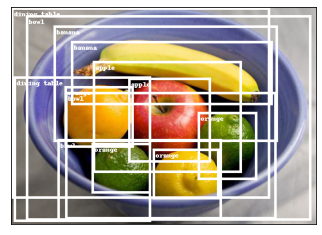

In [5]:
inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

lb = {}

for i in range(len(outputs[0]['labels'])):
    lb[i] = inst_classes[outputs[0]['labels'][i]]

    
score_threshold = .10
fruit_with_boxes = [
    draw_bounding_boxes(apple_int, boxes=output['boxes'][output['scores'] > score_threshold], labels=lb, width=4)
    for apple_int, output in zip(batch_int, outputs)
]

show(fruit_with_boxes)

## This is where the SSD stuff starts 

In [1]:
import torch
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')


Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/torchhub.zip" to C:\Users\Colin/.cache\torch\hub\torchhub.zip
C:\Users\Colin/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
C:\Users\Colin/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Colin/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%
Using cache found in C:\Users\Colin/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


In [2]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [3]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'http://images.cocodataset.org/val2017/000000037777.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg'
]

inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)



In [9]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)


In [13]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.10) for results in results_per_input]


In [14]:
classes_to_labels = utils.get_coco_object_dictionary()


### Visualization

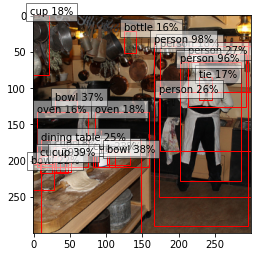

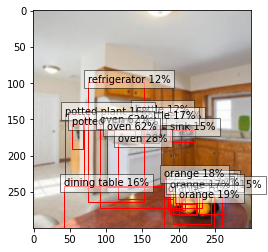

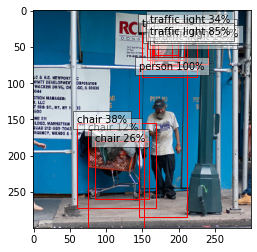

In [15]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()
